In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from openTSNE import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
data = pd.read_csv('train-data.csv')
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [7]:
data['EngineCC'] = data['Engine'].str.replace('CC', '').astype('float')
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,EngineCC
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,998.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,1582.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,1199.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,1248.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1968.0


In [8]:
data['PowerPHP'] = data['Power'].str.replace('bhp', '')
data['PowerPHP'] = data['PowerPHP'].str.replace('null','NaN')
data['PowerPHP'] = data['PowerPHP'].astype('float')

In [9]:
data['PowerPHP']

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
6014     74.00
6015     71.00
6016    112.00
6017     67.10
6018     57.60
Name: PowerPHP, Length: 6019, dtype: float64

In [10]:
print(data['Fuel_Type'].unique())

['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']


In [11]:
data
data[['Mileage_gt','Mileage_dv']] = data['Mileage'].str.split(' ',n=1, expand=True)
data['Mileage_gt'] = data['Mileage_gt'].astype('float')
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,EngineCC,PowerPHP,Mileage_gt,Mileage_dv
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,998.0,58.16,26.60,km/kg
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,1582.0,126.20,19.67,kmpl
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,1199.0,88.70,18.20,kmpl
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,1248.0,88.76,20.77,kmpl
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1968.0,140.80,15.20,kmpl


In [12]:
data['Mileage_dv'].unique()

array(['km/kg', 'kmpl', nan], dtype=object)

In [13]:
gia = {'CNG':39600/24000,'Diesel':20190/24000,'Petrol':22880/24000,'LPG':14700/24000}

In [14]:
data = data.dropna(subset=['Mileage_dv'])
data.query('Fuel_Type == "Electric"')

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,EngineCC,PowerPHP,Mileage_gt,Mileage_dv


In [15]:
data['price_per_km'] = data['Fuel_Type'].apply(lambda x: gia[x]) / data['Mileage_gt']
data

C:\Users\anhna\AppData\Local\Temp\ipykernel_17852\107824357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_per_km'] = data['Fuel_Type'].apply(lambda x: gia[x]) / data['Mileage_gt']


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,EngineCC,PowerPHP,Mileage_gt,Mileage_dv,price_per_km
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,998.0,58.16,26.60,km/kg,0.062030
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,1582.0,126.20,19.67,kmpl,0.042768
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,1199.0,88.70,18.20,kmpl,0.052381
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,1248.0,88.76,20.77,kmpl,0.040503
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1968.0,140.80,15.20,kmpl,0.055345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,1248.0,74.00,28.40,kmpl,0.029621
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,1120.0,71.00,24.40,kmpl,0.034477
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,2498.0,112.00,14.00,kmpl,0.060089
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,998.0,67.10,18.90,kmpl,0.050441


In [16]:
data_learing = data[['Year','Kilometers_Driven','Fuel_Type','price_per_km','Transmission','Owner_Type','EngineCC','PowerPHP','Seats','Price']]

In [17]:
data_learing.replace([np.inf, -np.inf], np.nan, inplace=True)
data_learing = data_learing.dropna()

C:\Users\anhna\AppData\Local\Temp\ipykernel_17852\3126042120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_learing.replace([np.inf, -np.inf], np.nan, inplace=True)


In [18]:
data_learing['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [19]:
ordinal_mapping = {
    'First': 1,
    'Second': 2,
    'Third': 3,
    'Fourth & Above': 4,
    # Thêm các ánh xạ khác nếu cần
}
data_learing['Owner_Type'] = data_learing['Owner_Type'].map(ordinal_mapping)

In [20]:
data_learing['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [21]:
ordinal_mapping = {
    'Manual': 1,
    'Automatic': 2,
    # Thêm các ánh xạ khác nếu cần
}
data_learing['Transmission'] = data_learing['Transmission'].map(ordinal_mapping)

In [22]:
data_learing['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [23]:
ordinal_mapping = {
    'Petrol': 1,
    'Diesel': 2,
    'LPG': 3,
    'CNG': 4,
    # Thêm các ánh xạ khác nếu cần
}
data_learing['Fuel_Type'] = data_learing['Fuel_Type'].map(ordinal_mapping)

In [24]:
data_learing

,Year,Kilometers_Driven,Fuel_Type,price_per_km,Transmission,Owner_Type,EngineCC,PowerPHP,Seats,Price
0,2010,72000,4,0.062030,1,1,998.0,58.16,5.0,1.75
1,2015,41000,2,0.042768,1,1,1582.0,126.20,5.0,12.50
2,2011,46000,1,0.052381,1,1,1199.0,88.70,5.0,4.50
3,2012,87000,2,0.040503,1,1,1248.0,88.76,7.0,6.00
4,2013,40670,2,0.055345,2,2,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,2,0.029621,1,1,1248.0,74.00,5.0,4.75
6015,2015,100000,2,0.034477,1,1,1120.0,71.00,5.0,4.00
6016,2012,55000,2,0.060089,1,2,2498.0,112.00,8.0,2.90
6017,2013,46000,1,0.050441,1,1,998.0,67.10,5.0,2.65


In [25]:
X = data_learing[['Year', 'Kilometers_Driven', 'Fuel_Type', 'price_per_km', 'Transmission', 'Owner_Type', 'EngineCC', 'PowerPHP','Seats']]
Y = data_learing['Price'] * 100000
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 497306372539.97626
R^2 Score: 0.6620604629138642


In [28]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 498038531803.57367
R^2 Score: 0.6615629314598639


In [29]:
from sklearn.linear_model import Lasso
Lasso_model = Lasso()
Lasso_model.fit(X_train, y_train)
y_pred = Lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 497310059748.781
R^2 Score: 0.6620579573082548


In [30]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor()
mlp_model.fit(X_train, y_train)
y_pred = mlp_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1050981173607.8785
R^2 Score: 0.28581632790812506


c:\Users\anhna\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 233538067786.9737
R^2 Score: 0.8413015579976781


In [32]:
y_pred = forest_model.predict(X_test)
for i in range(len(y_pred)):
    print(y_pred[i],' ',y_test.iloc[i])

516420.0   445000.0
459520.0   335000.0
817140.0   825000.0
1603360.0   1925000.0
902400.0   1709000.0
626440.0   675000.0
565060.0   679000.0
565470.0   564000.0
591680.0   535000.0
268180.0   375000.0
591710.0   525000.0
251800.0   200000.0
702130.0   1025000.0
729600.0   1005000.0000000001
588890.0   585000.0
771490.0   1082000.0
1397970.0   1283000.0
800150.0   699000.0
988050.0   1113000.0
209700.0   239000.0
282050.0   280000.0
2865900.0   2700000.0
479550.0   580000.0
2748800.0   2675000.0
271030.0   310000.0
491860.0   595000.0
429250.0   280000.0
820905.0   585000.0
1160430.0   1234000.0
107430.0   90000.0
4391890.0   3894000.0
119090.0   120000.0
922090.0   825000.0
2522670.0   2150000.0
821380.0   600000.0
578800.0   594000.0
3361660.0   4900000.0
329417.5   254999.99999999997
582220.0   635000.0
570930.0   565000.0
418190.0   450000.0
2878510.0   2678000.0
1340840.0   1300000.0
1662780.0   1550000.0
671600.0   739000.0
1004370.0   770000.0
93530.0   150000.0
5563080.0   160

In [33]:
from joblib import dump, load
# Huấn luyện mô hình
# Lưu mô hình
dump(forest_model, 'forest_model.joblib')

['forest_model.joblib']

In [34]:
data_of_car = pd.DataFrame()
data_of_car['Name'] = data['Name'].unique()
data_of_car['Fuel_Type'] = data_of_car['Name'].apply(lambda x: data[data['Name'] == x]['Fuel_Type'].iloc[0])

In [35]:
data_of_car['Transmission'] = data_of_car['Name'].apply(lambda x: data[data['Name'] == x]['Transmission'].iloc[0])

In [36]:
data_of_car['Engine'] = data_of_car['Name'].apply(lambda x: data[data['Name'] == x]['Engine'].iloc[0])

In [37]:
data_of_car['Seats'] = data_of_car['Name'].apply(lambda x: data[data['Name'] == x]['Seats'].iloc[0])

In [38]:
data_of_car['EngineCC'] = data_of_car['Name'].apply(lambda x: data[data['Name'] == x]['EngineCC'].iloc[0])

In [39]:
data_of_car['PowerPHP'] = data_of_car['Name'].apply(lambda x: data[data['Name'] == x]['PowerPHP'].iloc[0])

In [40]:
data_of_car['price_per_km'] = data_of_car['Name'].apply(lambda x: data[data['Name'] == x]['price_per_km'].min())

In [41]:
data_of_car

,Name,Fuel_Type,Transmission,Engine,Seats,EngineCC,PowerPHP,price_per_km
0,Maruti Wagon R LXI CNG,CNG,Manual,998 CC,5.0,998.0,58.16,0.062030
1,Hyundai Creta 1.6 CRDi SX Option,Diesel,Manual,1582 CC,5.0,1582.0,126.20,0.042768
2,Honda Jazz V,Petrol,Manual,1199 CC,5.0,1199.0,88.70,0.052381
3,Maruti Ertiga VDI,Diesel,Manual,1248 CC,7.0,1248.0,88.76,0.033029
4,Audi A4 New 2.0 TDI Multitronic,Diesel,Automatic,1968 CC,5.0,1968.0,140.80,0.055345
...,...,...,...,...,...,...,...,...
1869,Hyundai Elantra SX,Petrol,Manual,1797 CC,5.0,1797.0,147.50,0.058487
1870,Maruti Wagon R Duo Lxi,LPG,Manual,998 CC,5.0,998.0,58.20,0.023378
1871,Volkswagen Polo IPL II 1.2 Petrol Highline,Petrol,Manual,1198 CC,5.0,1198.0,73.90,0.055298
1872,Tata Bolt Revotron XT,Petrol,Manual,1193 CC,5.0,1193.0,88.70,0.054259


In [42]:
data = data.drop(columns=['Fuel_Type', 'Transmission', 'Engine', 'Seats', 'price_per_km','Mileage_gt','Mileage_dv','PowerPHP','Mileage','EngineCC'])

In [43]:
import  sqlite3
con = sqlite3.connect("car.db")
cur = con.cursor()

In [44]:
data.to_sql('data', con, index=False, if_exists='replace')

6017

In [45]:
data_of_car.to_sql('data_of_car', con, index=False, if_exists='replace')

1874

In [46]:
data_learing

,Year,Kilometers_Driven,Fuel_Type,price_per_km,Transmission,Owner_Type,EngineCC,PowerPHP,Seats,Price
0,2010,72000,4,0.062030,1,1,998.0,58.16,5.0,1.75
1,2015,41000,2,0.042768,1,1,1582.0,126.20,5.0,12.50
2,2011,46000,1,0.052381,1,1,1199.0,88.70,5.0,4.50
3,2012,87000,2,0.040503,1,1,1248.0,88.76,7.0,6.00
4,2013,40670,2,0.055345,2,2,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,2,0.029621,1,1,1248.0,74.00,5.0,4.75
6015,2015,100000,2,0.034477,1,1,1120.0,71.00,5.0,4.00
6016,2012,55000,2,0.060089,1,2,2498.0,112.00,8.0,2.90
6017,2013,46000,1,0.050441,1,1,998.0,67.10,5.0,2.65


C:\Users\anhna\AppData\Local\Temp\ipykernel_17852\3498736209.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby(pd.cut(df['Kilometers_Driven'],bins)).mean()


<Axes: xlabel='Kilometers_Driven'>

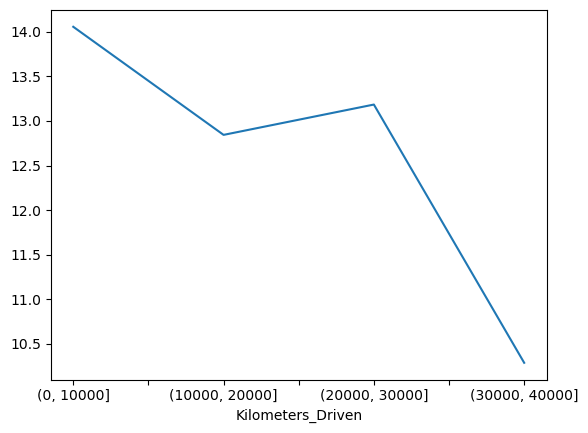

In [48]:
df = data_learing[['Kilometers_Driven','Price']]
bins = np.arange(0,50000,10000)
groups = df.groupby(pd.cut(df['Kilometers_Driven'],bins)).mean()
groups['Price'].plot.line()

In [50]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = data_learing[['EngineCC','Kilometers_Driven','Seats']]
y = data_learing['Price']
x[['EngineCC','Kilometers_Driven','Seats']] = scaler.fit_transform(x[['EngineCC','Kilometers_Driven','Seats']].values)
x = sm.add_constant(x)
est = sm.OLS(y,x).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     1853.
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:09:22   Log-Likelihood:                -20450.
No. Observations:                5844   AIC:                         4.091e+04
Df Residuals:                    5840   BIC:                         4.093e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.5455      0.10

C:\Users\anhna\AppData\Local\Temp\ipykernel_17852\662949306.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['EngineCC','Kilometers_Driven','Seats']] = scaler.fit_transform(x[['EngineCC','Kilometers_Driven','Seats']].values)
